# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project 1: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [23]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import visuals as vs # Supplementary code
from sklearn.model_selection import ShuffleSplit

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)



# Success
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)

Boston housing dataset has 489 data points with 4 variables each.


c:\python27\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
c:\python27\lib\site-packages\sklearn\learning_curve.py:23: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [24]:
# TODO: Minimum price of the data
minimum_price = prices.min()

# TODO: Maximum price of the data
maximum_price = prices.max()

# TODO: Mean price of the data
mean_price = prices.mean()

# TODO: Median price of the data
median_price = prices.median()

# TODO: Standard deviation of prices of the data
std_price = prices.std()

# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,340.28


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.

_Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MEDV'` or a **decrease** in the value of `'MEDV'`? Justify your answer for each._  
**Hint:** Would you expect a home that has an `'RM'` value of 6 be worth more or less than a home that has an `'RM'` value of 7?

For RM correlation is positive at the value of the correlation coeffient at
0.697209221019
For LSTAT correlation is negative at the value of the correlation coeffient at
-0.760670059973
For PTRATIO correlation is negative at the value of the correlation coeffient at
-0.519033503532


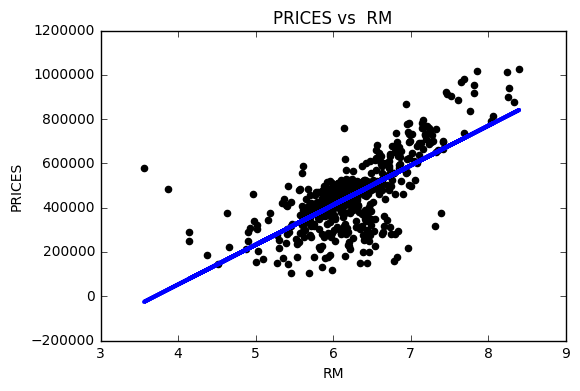

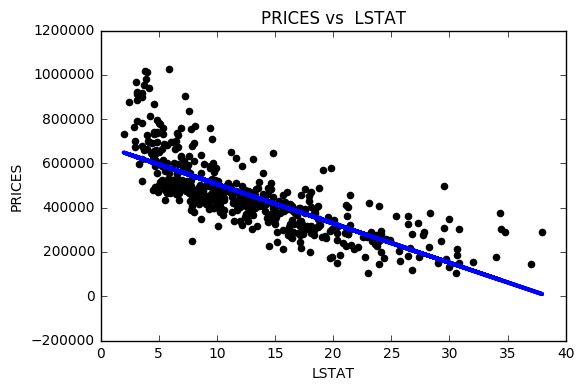

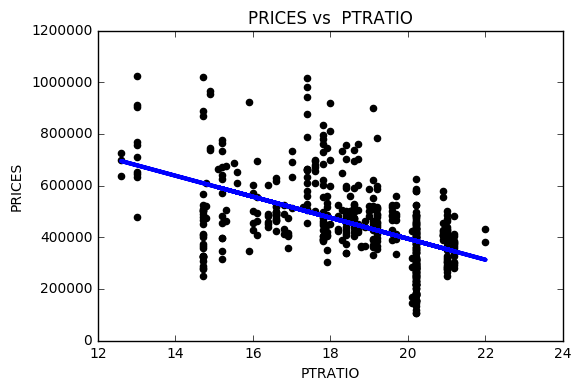

In [25]:
import matplotlib.pyplot as plt

params_corr = []

for col in features.columns:
    fig, ax = plt.subplots()
    fit = np.polyfit(features[col], prices, deg=1) # We use a linear fit to compute the trendline
    correlation = np.corrcoef(features[col], prices)
    if correlation[0, 1] > 0:
        print 'For ' + col + ' correlation is positive at the value of the correlation coeffient at'
        print correlation[0, 1]
    elif correlation[0, 1] == 0:
        raise RuntimeError('There is no correlation between ' + col + ' and the prices')
    else:
        print 'For ' + col + ' correlation is negative at the value of the correlation coeffient at'
        print correlation[0, 1]
    params_corr.append(correlation[0, 1])
    ax.scatter(features[col], prices, color ='black')
    #plt.plot(features [col], prices, 'o', color='black')#black circles
    ax.plot(features[col], fit[0] * features[col] + fit[1], color='blue', linewidth=3) # This plots a trendline with the regression parameters computed earlier. We should plot this after the dots or it will be covered by the dots themselves
    plt.title('PRICES vs  '+ str(col)) # title here
    plt.xlabel(col) # label here
    plt.ylabel('PRICES') # label here
    

**Answer:** I suspect that the increase in RM will signify higher pricing of the house since the size of the house and the amount of privacy provided will indeed be the features buyers desire. While the increase in LSTAT and PTRATIO will lead to lower pricing of the house, because the house's value is mostly computed by one of the buyers' fundamental desires, to have a base for financial security which is unlikely to be provided in a poor neighborhood, and because one of the buyers' concerns, education for their children is better satisfied if there are lesser amounts of students with larger quantities of teachers, which provides a dedicated educational environment for the students, respectively. These facts can be observed from the graphs above (I do not take credit for this code for the graphs since that code was provided as an advice from the previous reviewer) as well as from the values of the correlation coefficients. Yet to be fair the variance of the data for the PTRATIO appears to be too high to draw such a simple conclusion as I had above.

----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 always fails to predict the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. *A model can be given a negative R<sup>2</sup> as well, which indicates that the model is no better than one that naively predicts the mean of the target variable.*

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [26]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score
def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |
*Would you consider this model to have successfully captured the variation of the target variable? Why or why not?* 

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [27]:
# Calculate the performance of this model

score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])

print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

Model has a coefficient of determination, R^2, of 0.923.


**Answer:** I say it had indeed captured the variation of the model quite accurately since over 90% of the variation in [2.5, 0.0, 2.1, 7.8, 5.3] can be explained by variation in [3, -0.5, 2, 7, 4.2]

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [28]:
# TODO: Import 'train_test_split'
from sklearn.model_selection import train_test_split
# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size = 0.2, train_size = 0.8, random_state = 42)

# Success
print "Training and testing split was successful."

Training and testing split was successful.


### Question 3 - Training and Testing
*What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?*  
**Hint:** What could go wrong with not having a way to test your model?

**Answer: ** The benefit of splitting a dataset into a ratio of training and testing subsets is that we can quantify its accuracy from it. Without testing beforehand, we may accidentally over fit or under fit the model without our knowledge of it and if worst comes to worst, because of our ignorance we may also implement it into the production. Long story short all hell will break loose.

----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

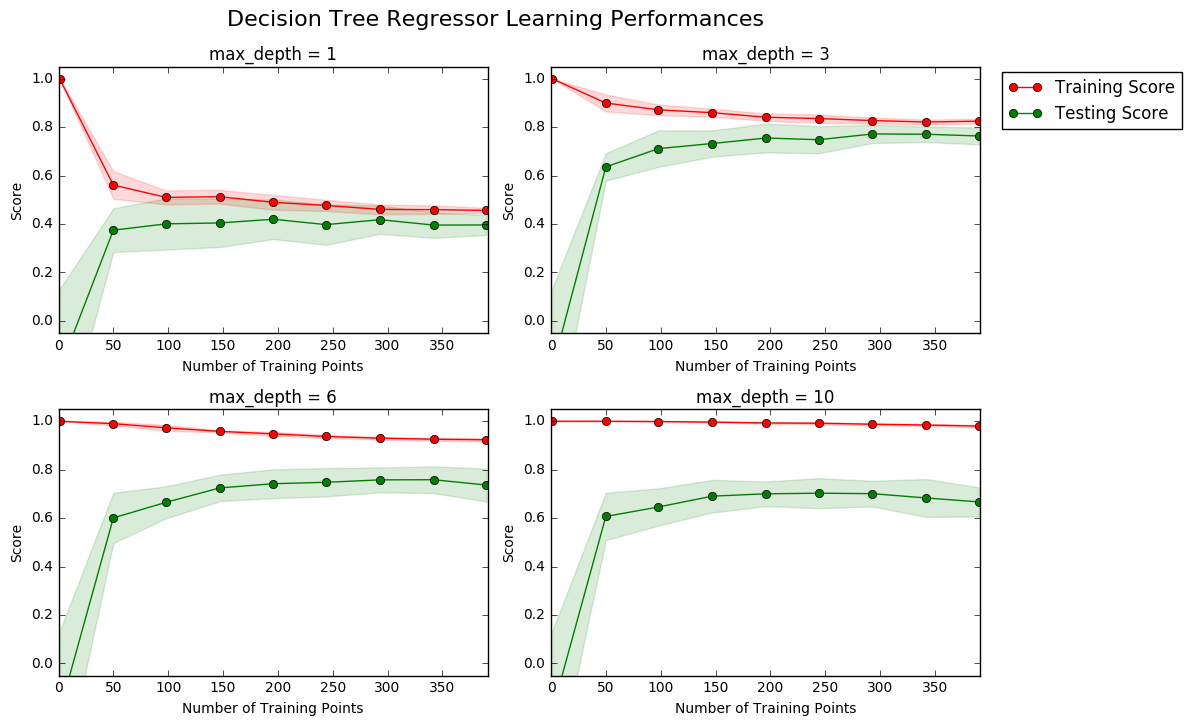

In [29]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
*Choose one of the graphs above and state the maximum depth for the model. What happens to the score of the training curve as more training points are added? What about the testing curve? Would having more training points benefit the model?*  
**Hint:** Are the learning curves converging to particular scores?

**Answer: ** From the observation that I conducted on Graph with max_depth = 3, the testing score is increasing with more data points added while the training score is decreasing. For this model, it appears as though it is at a point where the increase in data points after around roughly at 350 training points will be a negligible improvement of the accuracy of the model since, at that point, it can be said that the model has learned as much as it can from the dataset. Also, it can be said to have the best bias-variance tradeoffs out of these four options due to there being no gap between the testing score curve and the training score curve where their curves plateau as well as no high error coverages on either curve.

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

Run the code cell below and use this graph to answer the following two questions.

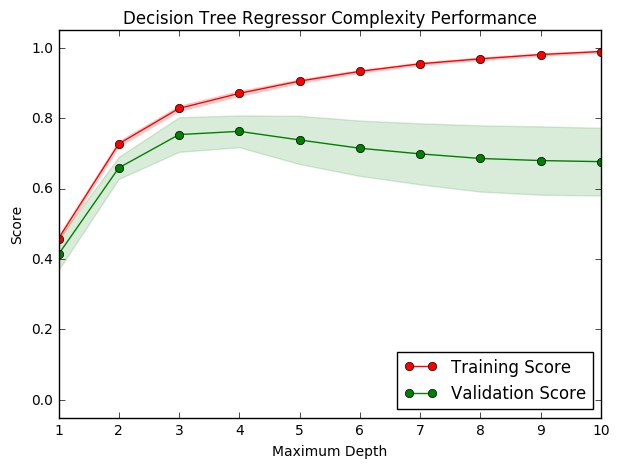

In [30]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
*When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?*  
**Hint:** How do you know when a model is suffering from high bias or high variance?

**Answer: ** When the model is fit with a maximum depth of 1 the model suffers from high bias, the model is stricktly not able to describe the complexity of the data which results in underfitting of the data. This can be observed from the exteme low score of both the training score and the validation score. The model with a maximum depth of 10 suffers from high variance which is caused by overfitting. This can be observed from the significant gap between the training score and the validation score where the training score is extremely close to 1.

### Question 6 - Best-Guess Optimal Model
*Which maximum depth do you think results in a model that best generalizes to unseen data? What intuition lead you to this answer?*

In [31]:
import sklearn.learning_curve as curves
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, ShuffleSplit

# Vary the max_depth parameter from 1 to 10
param_grid = {'max_depth': np.arange(1, 11)}


# Calculate the training and testing scores
cv = ShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 0)
clf = GridSearchCV(DecisionTreeRegressor(), param_grid, scoring = 'r2', cv = cv)
clf.fit(X_train, y_train)
clf.best_params_

{'max_depth': 4}

**Answer: ** From my code above I will draw quite a reasonable assumption that around 4 will be the golden zone. Yet also this is quite evident from both the model and the validation score's curves' consistent score of roughly 0.8 which is higher than all the other parameters

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
*What is the grid search technique and how it can be applied to optimize a learning algorithm?*

**Answer: ** The grid search technique is a technique to find the optimum parameters for a estimator from a grid of parameters. It can optimize the learning algorithm by finding the best variance bias tradeoff.

### Question 8 - Cross-Validation
*What is the k-fold cross-validation training technique? What benefit does this technique provide for grid search when optimizing a model?*  
**Hint:** Much like the reasoning behind having a testing set, what could go wrong with using grid search without a cross-validated set?

**Answer: ** The k-fold cross validation technique is a technique to compute the accuracy of the test k times where the testing size will be n/k where n is the total number of data elements. The average is used to compute the final score. The benefit of using this method over only dividing once is that this method maximizes the amount of data points contained in both the training and testing dataset. If this is not done for the grid search, we may risk the possibility of not being accurate with the optimized parameters it returns.

### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

I made a change to this in that this function is more generalizable. While it may seem that I did not complete the first step, I actually did  in that it was added as a parameter to the function later on and hence done.

In [32]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
#DecisionTreeRegressor and GridSearchCV is already imported above
from sklearn.metrics import make_scorer, r2_score
def fit_model(X, y, regressor, params):#Added these two parameters for this to be compatible with almost any regressor
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(r2_score)

    # TODO: Create the grid search object
    #Since the grid search takes an excessive amount of time on some occasions I will use the RandomizedSearchCV instead
    grid = GridSearchCV(regressor, params, scoring = scoring_fnc, cv = cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    print grid.best_params_
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model
_What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?_  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [33]:
# Fit the training data to the model using grid search
decision_tree_reg = fit_model(X_train, y_train, DecisionTreeRegressor(), {'max_depth': np.arange(1, 11)})

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(decision_tree_reg.get_params()['max_depth'])

{'max_depth': 4}
Parameter 'max_depth' is 4 for the optimal model.


**Answer: ** The maximum depth of the optimum model will be 4. Exactly as my former self found out by doing these exact steps during the answering of Question 6.

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |
*What price would you recommend each client sell his/her home at? Do these prices seem reasonable given the values for the respective features?*  
**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  

Run the code block below to have your optimized model make predictions for each client's home.

In [34]:
predictions = {'Decision Tree':[], 'Nearest Neighbors': [[],[]], 'SVR': [], 'Ridge Regressor': [], 'Ada Boosting': []}


The predictions for all the estimators will be stored in the object above, yet since some had abhorrent results I will not take into consideration all of their predictions in the process of finding the optimal predictions

The code below is for the test_stat function, proportionally let's see what is the magnitude of change in the parameters LSTAT and PTRATIO if RM varies by one.

In [35]:
RM_range = features['RM'].max() - features['RM'].min()
LSTAT_range = features['LSTAT'].max() - features['LSTAT'].min()
PTRATIO_range = features['PTRATIO'].max() - features['PTRATIO'].min()
delta_LSTAT = LSTAT_range/RM_range
delta_PTRATIO = PTRATIO_range/ RM_range

In the code below, I made a function that reports the descriptive statistics of a prediction given the data of prediction of prices for client 1 to client 3, with respect to the data points around the parameters in client data.

In [36]:
from scipy.stats import ttest_1samp as ttest #imported as a mean to conduct a tests

def test_stat(data, test_type):
    param_names = ['RM', 'LSTAT', 'PTRATIO']
    client_names = ['Client 1', 'Client 2', 'Client 3']
    stats = {'Client 1':{'mean': 0, 'std': 0, 'tstat': [], 'length': 0}, 'Client 2': {'mean': 0, 'std': 0, 'tstat': [], 'length': 0},\
                 'Client 3': {'mean': 0, 'std': 0, 'tstat': [], 'length': 0}}
    def return_param_data(X, y, i):
        return y[(X[param_names[0]] <= client_data[i][0] + 1) &\
                      (X[param_names[0]] >= client_data[i][0] - 1) &\
                      (X[param_names[1]] <= client_data[i][1] + delta_LSTAT) &\
                      (X[param_names[1]] >= client_data[i][1] - delta_LSTAT) &\
                      (X[param_names[2]] <= client_data[i][2] + delta_PTRATIO) &\
                      (X[param_names[2]] >= client_data[i][2] - delta_PTRATIO)]#Get all prices in that range
    for iter_num, price in enumerate(data):
        #Depending on the test-type 
        if test_type == 'train':
            param_data =  return_param_data(X_train, y_train, iter_num)
        elif test_type == 'test':
            param_data =  return_param_data(X_test, y_test, iter_num)
            #The data of the prices around each of the values of the given parameters in client_data
        else:
            raise ValueError(test_type)
        
            #The data of the prices around each of the values of the given parameters in client_data
        client_stats = stats[client_names[iter_num]]
        client_stats['mean'] = param_data.mean() if np.isnan(param_data.mean()) == False else 0
        client_stats['std'] = param_data.std() if np.isnan(param_data.std()) == False else 0
        client_stats['tstat'] = ttest(param_data, price) \
            if np.isnan(ttest(param_data, price)[0]) == False and np.isnan(ttest(param_data, price)[1]) == False\
            else [0, 0]
        client_stats['length'] = len(param_data)
        
        print "At price point {} dollars, for Client {}, the p_value of the given price is {}, the mean/optimum prediction is {}, while the length is {}, and the standard "\
        "deviation is {}"\
        .format(price, iter_num + 1, client_stats['tstat'][1], client_stats['mean'], client_stats['length'], client_stats['std'])


Now let's test it!

In [37]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3


# Show predictions
print "With the original regressor\n"
print "For the training sets\n"
test_stat(decision_tree_reg.predict(client_data), 'train')


print "\nFor the testing sets\n"
test_stat(decision_tree_reg.predict(client_data), 'test')

predictions['Decision Tree'] = decision_tree_reg.predict(client_data)

With the original regressor

For the training sets

At price point 403025.0 dollars, for Client 1, the p_value of the given price is 0.929011026748, the mean/optimum prediction is 401493.75, while the length is 16, and the standard deviation is 67606.6019335
At price point 237478.723404 dollars, for Client 2, the p_value of the given price is 0.74537602039, the mean/optimum prediction is 247200.0, while the length is 7, and the standard deviation is 75626.3842849
At price point 931636.363636 dollars, for Client 3, the p_value of the given price is 0.0109989254577, the mean/optimum prediction is 793100.0, while the length is 9, and the standard deviation is 126270.958656

For the testing sets

At price point 403025.0 dollars, for Client 1, the p_value of the given price is 0.175924327145, the mean/optimum prediction is 438375.0, while the length is 4, and the standard deviation is 40079.2028364
At price point 237478.723404 dollars, for Client 2, the p_value of the given price is 0, the 

c:\python27\lib\site-packages\numpy\core\_methods.py:82: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)
c:\python27\lib\site-packages\numpy\core\_methods.py:116: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\python27\lib\site-packages\scipy\stats\stats.py:3658: RuntimeWarning: invalid value encountered in absolute
  prob = distributions.t.sf(np.abs(t), df) * 2  # use np.abs to get upper tail
c:\python27\lib\site-packages\scipy\stats\_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
c:\python27\lib\site-packages\scipy\stats\_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
c:\python27\lib\site-packages\scipy\stats\_distn_infrastructure.py:1814: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.

For the statistic above, the amount of data points can only be described as in a state of being inadequate, especially for the testing set. Hence I will only use it for comparisons with the other models. Yet for the p values given by the training set and the testing set, at least for client 1, does not appear to be too shabby. Hence, as the previous reviewer advised I will use the Nearest Neighbor algorithm since it provides k number of nearest data point regardless of where the data point was coordinated

In [38]:
from sklearn.neighbors import NearestNeighbors

def nearest_neighbor_loop(): 
    neighbor_data = []
    for i in client_data:
        val=nearest_neighbor_price(i)
        print "The predicted {} nearest neighbors price for home {} is: ${:,.2f}".format(num_neighbors,i, val)
        neighbor_data.append(val)
    data.append(neighbor_data)
    
print "With k = 5"
num_neighbors=5
data = []
def nearest_neighbor_price(x):
    sum_prices = []
    def find_nearest_neighbor_indexes(x, X):  # x is your vector and X is the data set.
        neigh = NearestNeighbors( num_neighbors )
        neigh.fit(X)
        distance, indexes = neigh.kneighbors( x )
        print distance.max()
        return indexes #The indexes of the k amount of points close to it
    indexes = find_nearest_neighbor_indexes(x, features)
    for i in indexes:
        sum_prices.append(prices[i])
    neighbor_avg = np.mean(sum_prices)
    return neighbor_avg
nearest_neighbor_loop()
print "With k = 12"
num_neighbors = 12 

nearest_neighbor_loop()
predictions['Nearest Neighbors'] = data
print predictions


With k = 5
1.57937361001
The predicted 5 nearest neighbors price for home [5, 17, 15] is: $372,540.00
2.70911590745
The predicted 5 nearest neighbors price for home [4, 32, 22] is: $162,120.00
2.92166476516
The predicted 5 nearest neighbors price for home [8, 3, 12] is: $897,120.00
With k = 12
2.86762689344
The predicted 12 nearest neighbors price for home [5, 17, 15] is: $403,725.00
4.18371891981
The predicted 12 nearest neighbors price for home [4, 32, 22] is: $206,500.00
3.46455249636
The predicted 12 nearest neighbors price for home [8, 3, 12] is: $842,625.00
{'Ridge Regressor': [], 'Ada Boosting': [], 'SVR': [], 'Nearest Neighbors': [[372540.0, 162120.0, 897120.0], [403725.0, 206500.0, 842625.0]], 'Decision Tree': array([ 403025.        ,  237478.72340426,  931636.36363636])}


c:\python27\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
c:\python27\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
c:\python27\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
c:\python27\lib\site-packages\skle

Hence, as can be observed, by merely increasing the amount of nearest neighbors to 12 from 5, the price changes dramatically as well as the maximum distance in the "neighborhood" for client 1, the maximum distance in question nearly doubled from the previous point of the maximum distance. From which we can say that the data points are not close enough to each other to from which we can draw an accurate measure on whether a price is accurate or not. Yet, on the other hand, as is the same for the test_stat function, we can still use this for the purpose of merely comparing the performance of estimators to each other.

The code below illustrates, or to put in a more applicable term, plots the destribution of features in respect to each column in regards to the price of the houses

Thanks to the previous reviewer for helping me implement this scatter plot.
Thanks to http://stackoverflow.com/questions/20105364/how-can-i-make-a-scatter-plot-colored-by-density-in-matplotlib for the weighed coloring of the scatter plot.

Yet before that, let's make a function that shows our predictions on a graph, relative to the data range specified

In [74]:
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

def plot_base():
    for col in features.columns:
        xy = np.vstack((features[col], prices))
        z = gaussian_kde(xy)(xy)
        fig, ax = plt.subplots()
        ax.scatter(features[col], prices, c = z)
        plt.title('PRICES vs  '+ str(col))
        plt.xlabel(col)
        plt.ylabel('PRICES')

def plot_destribution(regs, colors, labels):
    for col in features.columns:
        xy = np.vstack((features[col], prices))
        z = gaussian_kde(xy)(xy)
        fig, ax = plt.subplots()
        ax.scatter(features[col], prices, c = z)
        for (reg, color, label) in zip(regs, colors, labels):
            ax.scatter( X_test[col], reg.predict(X_test), c = color, label = label)
        plt.title('PRICES vs  '+ str(col))
        plt.xlabel(col)
        plt.ylabel('PRICES')

            
    

def plot_predictions(preds, colors, labels):
    for i, col in enumerate(features.columns):
        xy = np.vstack((features[col], prices))
        z = gaussian_kde(xy)(xy)
        fig, ax = plt.subplots()
        ax.scatter(features[col], prices, c = z)
        for (pred, color, label) in zip(preds, colors, labels):
            ax.scatter( np.array(client_data)[:,i], pred, c = color, s = 100, label = label)
        plt.title('PRICES vs  '+ str(col))
        plt.xlabel(col)
        plt.ylabel('PRICES')
            
#Sadly I was not able to make a super/delegate function, a function that can be used for all 3 of these similar functions. It pains me immensely to reiterate 
#my code to this extent, yet sadly, I could not find an alternative way.

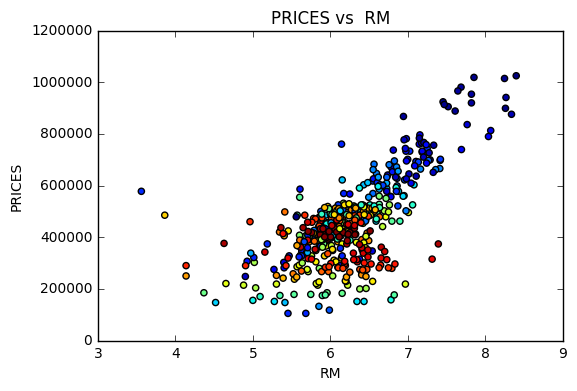

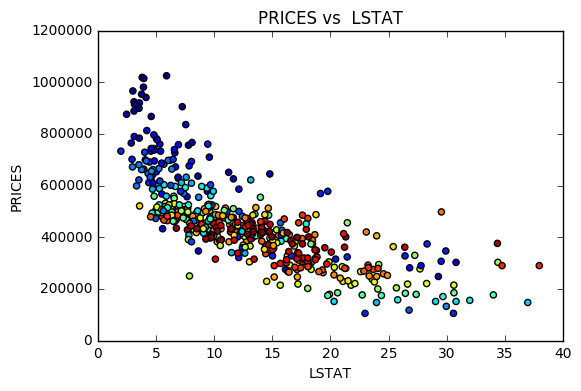

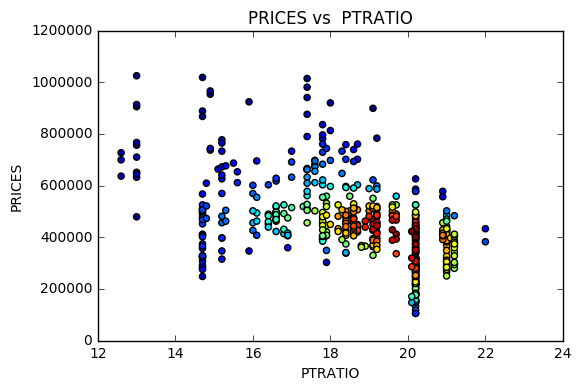

In [76]:
plot_base()

[5, 17, 15], # Client 1

[4, 32, 22], # Client 2

[8, 3, 12] # Client 3
               
               
For the RM parameters, as can be observed above has quite a scarce amounts of data at their respective numerical values, especially for client 2 and client 3.

For the LSTAT parameters, equally for client 2 and 3 are quite scarce. Yet not especially for client 1.

For the PTRATIO, the same can be said as above.

In conclusion as the code above demonstrates, especially for client 2 and 3 there are inadequate quantities of data to conclude that a prediction of an algorithm was incorrect. Now, let's look at their prediction values in the scatter plot to make sure the predictions seem reasonable.

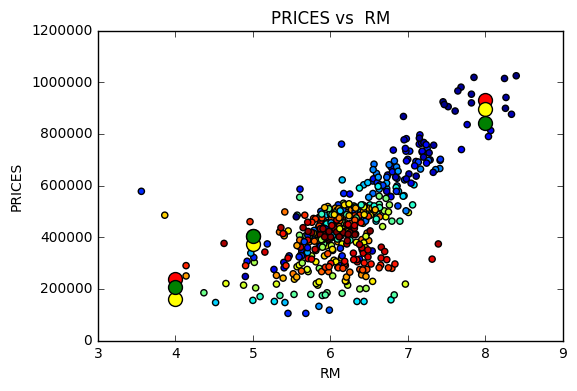

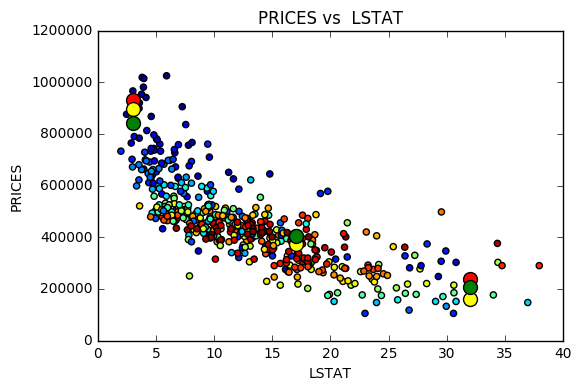

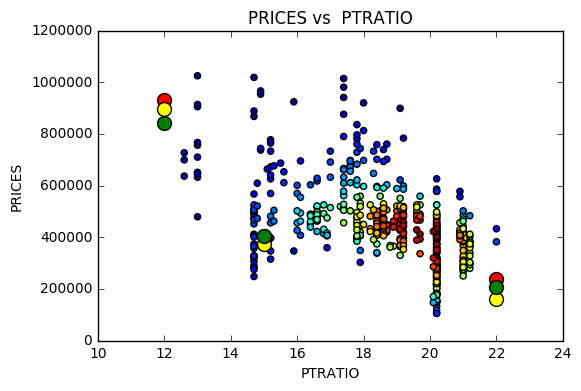

In [77]:
plot_predictions([predictions['Decision Tree'], predictions['Nearest Neighbors'][0], predictions['Nearest Neighbors'][1]],\
                ['red', 'yellow', 'green'], ['Decision Tree Regressor', 'Nearest Neighborhood k = 5', 'Nearest Neighborhood k = 12'])

Basically, it appears, at least from the observation that can be conducted here, that the values given by the decision tree regressor are quite 
similar to those given by the Nearest Neighborhood algorithm. Also, the points given by the predictions does not seem excessively irrational,


Yet, just in case I am wrong in seeing no mistakes in these predictions, I will proceed to work with this dataset with a further optimal algorithm 

Thanks to http://stackoverflow.com/questions/10628262/inserting-image-into-ipython-notebook-markdown for making me be able to display this 
image
and thanks to http://scikit-learn.org/stable/tutorial/machine_learning_map/ for making me be able to choose the best estimator, which may be the Support Vector Regressor

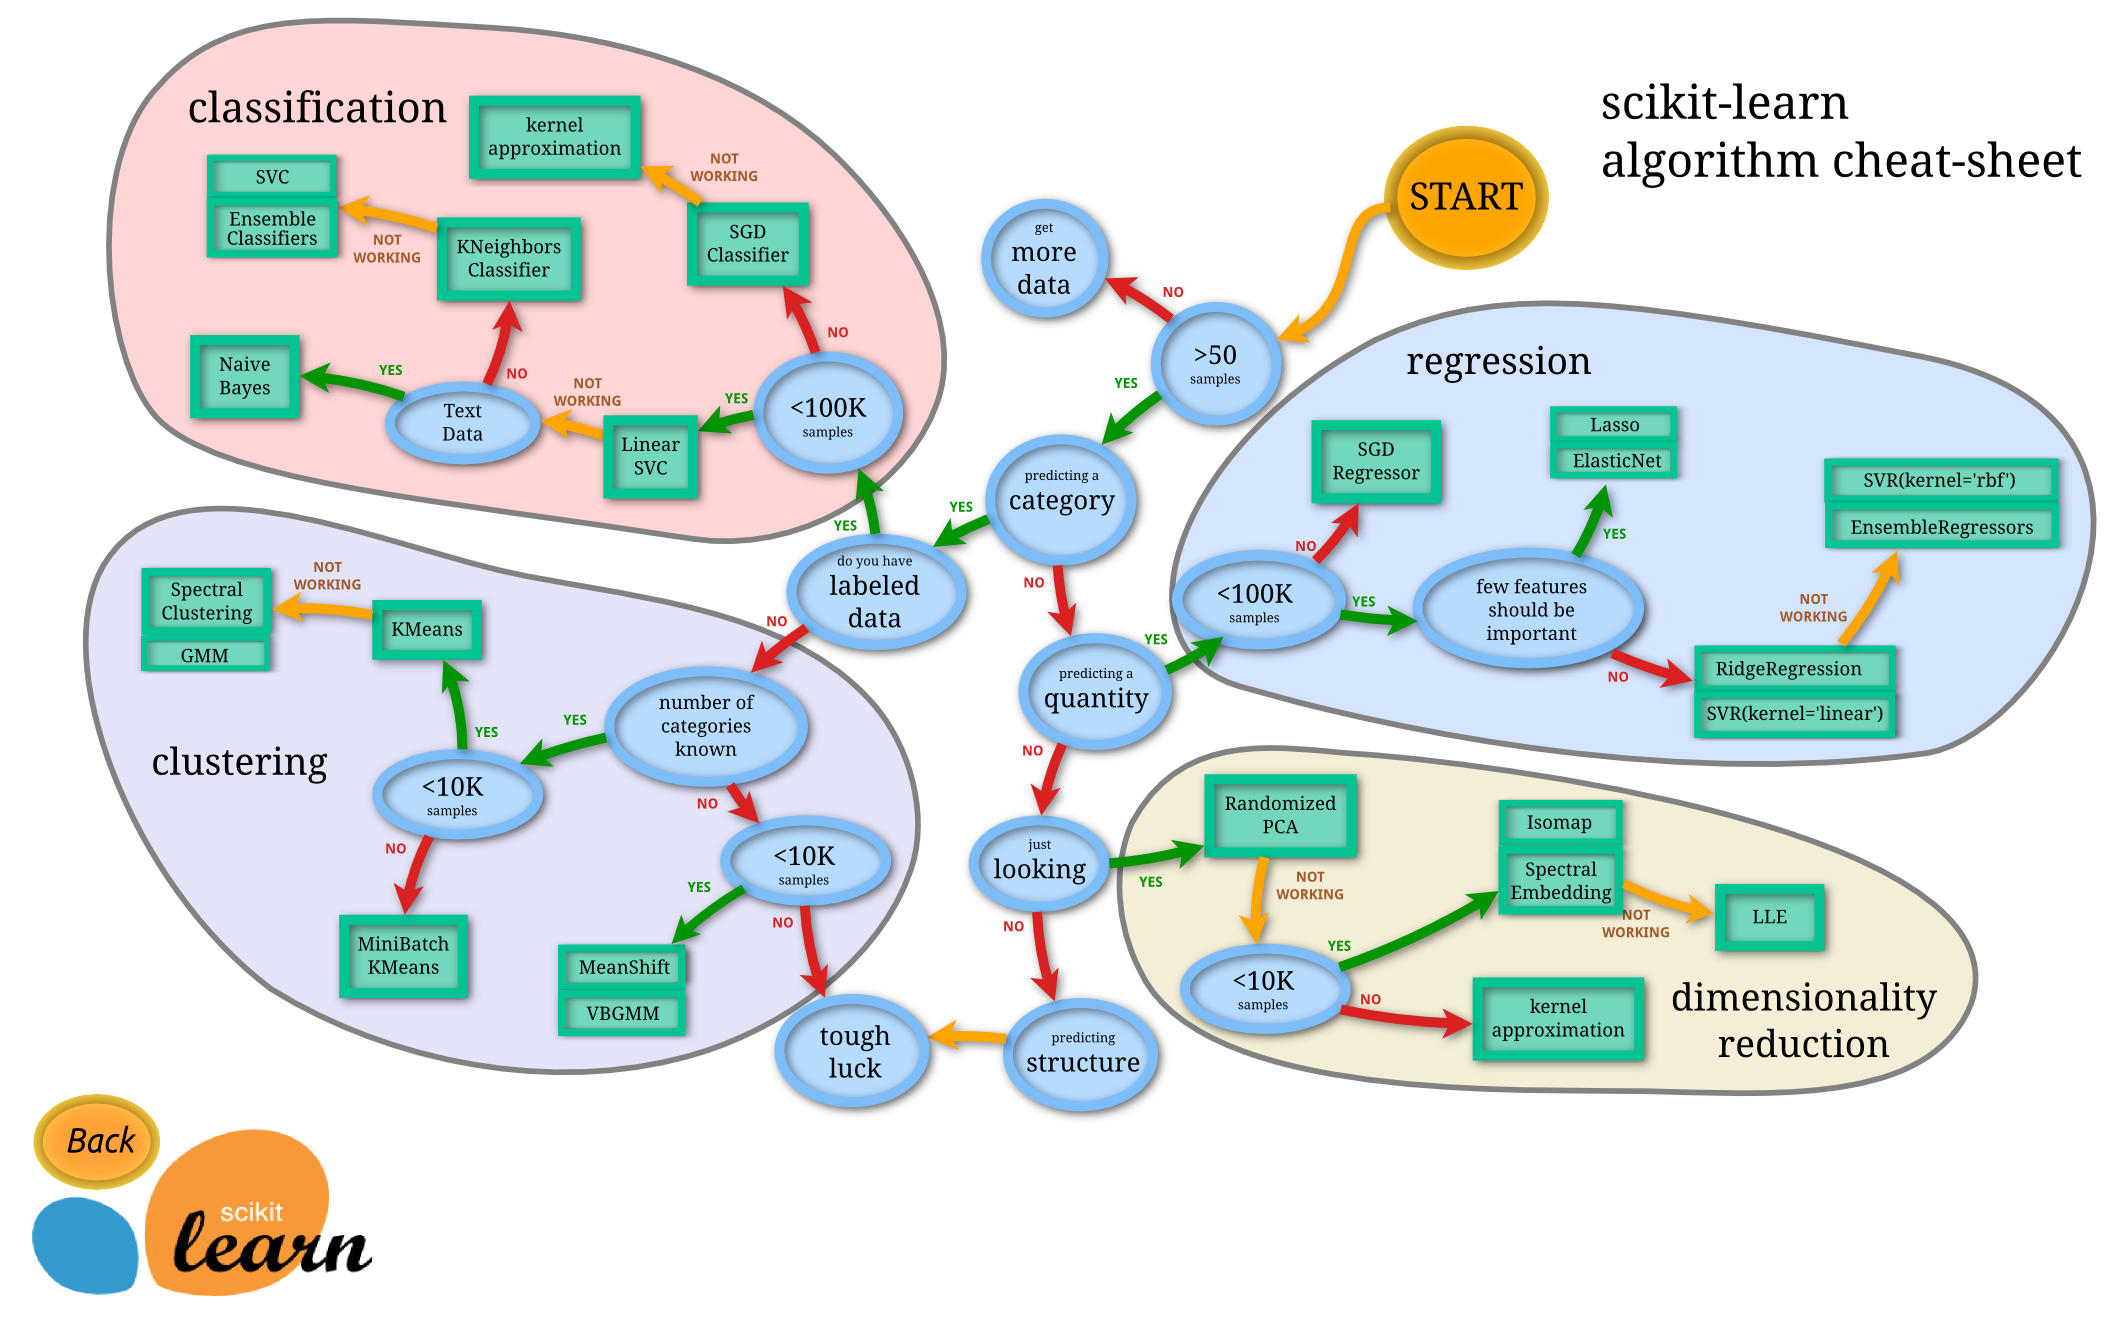

In [41]:
from IPython.display import Image
Image(filename='ml_map.png')

In [42]:
#Establishing svm
from sklearn.svm import SVR as SVR
#Preprocessing the data since the latter portion(grid searching) takes an excessive amount of time to complete
from sklearn import preprocessing
X_scaled_train = preprocessing.scale(X_train) 

svr = fit_model(X_scaled_train, y_train, SVR(), \
                                                  [{'C': [0.1, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000],
                                                   'kernel': ['linear']
                                                  },
                                                  {'C': [0.1, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000],\
                                                   'gamma': [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1],\
                                                   'kernel': ['rbf']}])

#Since the scoring algorithm for the current estimator and the svm estimator differs(mean accuracy, r2), I will use the same 
#scoring algorithm that evaluates their predictions, which computes the mean squared error
from sklearn.metrics import mean_squared_error as score
#The current score for the model is 
decision_tree_testing_score = score(y_test, decision_tree_reg.predict(X_test))
svr_testing_score = score(y_test, svr.predict(X_test))
decision_tree_training_score = score(y_train, decision_tree_reg.predict(X_train))
svr_training_score = score(y_train, svr.predict(X_train))
print "The testing score for the current(Decision tree) algorithm is {}".format(decision_tree_testing_score)
print "The testing score for the svr algorithm is {}".format(svr_testing_score)
print "The training score for the decision tree algorithm is {}".format(decision_tree_training_score)
print "The training score for the svr algorithm is {}".format(svr_training_score)

print "Yet looks are decieving, lets look at the predictions it is making"
print svr.predict(features)
predictions['SVR'] = svr.predict(client_data)

{'kernel': 'rbf', 'C': 1000000, 'gamma': 0.1}
The testing score for the current(Decision tree) algorithm is 3428515260.62
The testing score for the svr algorithm is 25604557016.1
The training score for the decision tree algorithm is 3977853997.7
The training score for the svr algorithm is 28875802820.5
Yet looks are decieving, lets look at the predictions it is making
[ 484981.36909797  484981.3690839   484981.3690839   484981.3690839
  484981.3690839   484981.3690839   484981.3690839   484981.3690839
  484981.3690839   484981.3690839   484981.3690839   484981.3690839
  484981.3690839   484981.3690839   484981.3690839   484981.3690839
  484981.3690839   484981.3690839   484981.3690839   484981.3690839
  484981.3690839   484981.3690839   484981.3690839   484981.3690839
  484981.3690839   484981.3690839   484981.3690839   484981.3690839
  484981.3690839   484981.3690839   484981.3690839   484981.3690839
  484981.3690839   484981.3690839   484981.3690839   484981.3690839
  484981.3690839 

Basically, for some reason it is merely predicting roughly the same price over and over again regardless of the parameters, which
appearantly ends up with a small mean squared error. Yet, since it will be quite a statement in saying that these predictions are optimal, and since I am not sure where the svr went wrong, I think I will resolve to say that I will use the ridge regressor instead

In [69]:
from sklearn.linear_model import Ridge

ridge_reg = fit_model(X_train, y_train, Ridge(), {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]})
decision_tree_testing_score = score(y_test, decision_tree_reg.predict(X_test))
svr_testing_score = score(y_test, svr.predict(X_test))
ridge_testing_score = score(y_test, ridge_reg.predict(X_test))
decision_tree_training_score = score(y_train, decision_tree_reg.predict(X_train))
svr_training_score = score(y_train, svr.predict(X_train))
ridge_training_score = score(y_train, ridge_reg.predict(X_train))
print "The testing score for the current(Decision tree) algorithm is {}".format(decision_tree_testing_score)
print "The testing score for the svr algorithm is {}".format(svr_testing_score)
print "The testing score for the ridge regressor is {}".format(ridge_testing_score)
print "The training score for the decision tree algorithm is {}".format(decision_tree_training_score)
print "The training score for the svr algorithm is {}".format(svr_training_score)
print "The training score for the ridge regressor is {}".format(ridge_training_score)
predictions['Ridge Regressor'] = ridge_reg.predict(client_data)

{'alpha': 0.01}
The testing score for the current(Decision tree) algorithm is 3428515260.62
The testing score for the svr algorithm is 25604557016.1
The testing score for the ridge regressor is 6789011899.49
The training score for the decision tree algorithm is 3977853997.7
The training score for the svr algorithm is 28875802820.5
The training score for the ridge regressor is 7949715221.2


Hence, I am sure it is safe to say that the ridge regressor performs horrendously as well. Now, lets look at the AbaBoostRegressor(which is an ensemble regressor), with our hopes and dreams intact and far from diminishing.

In [44]:
from sklearn.ensemble import AdaBoostRegressor

    for i in range(1,5):

            boosted_reg = fit_model(X_train, y_train, AdaBoostRegressor(DecisionTreeRegressor(max_depth = 4)), {'n_estimators': np.arange(1, 100), 'learning_rate': [0.1]})

The code above returns different parameters on every iteration, hence the gridSearchCV can be said to not return the optimum parameters, 
yet from the grid searching I conducted manually the n_estimators value of 45 was optimal and hence I will procceed to use it as such


In [45]:
boosted_reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth = 4), n_estimators = 45, learning_rate = 0.1)
boosted_reg.fit(X_train, y_train)
boosted_reg_test_score = score(y_test, boosted_reg.predict(X_test))
boosted_reg_train_score = score(y_train, boosted_reg.predict(X_train))
print "The testing score for the Ada boost regressor is {}".format(boosted_reg_test_score)
print "The training score for the Ada boost regressor is {}".format(boosted_reg_train_score)
predictions['Ada Boosting'] = boosted_reg.predict(client_data)

The testing score for the Ada boost regressor is 3112909131.87
The training score for the Ada boost regressor is 3000419189.59


This estimator seems to be quite decent, at least, statistically

Let's view how the predictions from the estimator gets plotted on the graph, in regards to X test dataset

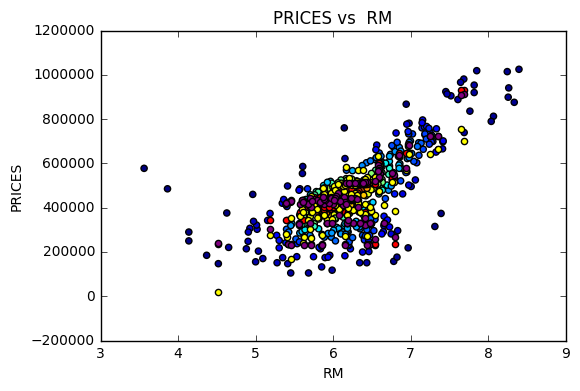

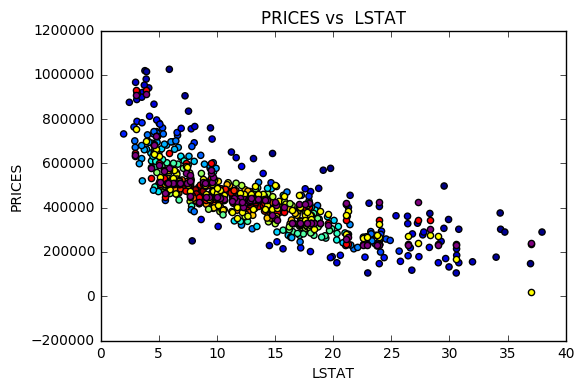

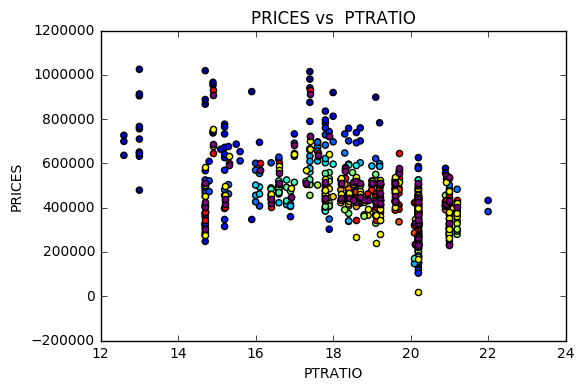

In [71]:
plot_destribution([decision_tree_reg, ridge_reg, boosted_reg], ['red', 'yellow', 'purple'],\
                 ['Decision Tree Regressor', 'Ridge Regressor', 'Ada Boosing Regressor'])

Now, distribution wise, the Ada Booster Regressor seems to be quite accurate, now let's see whether we can see any problems prediction wise. 

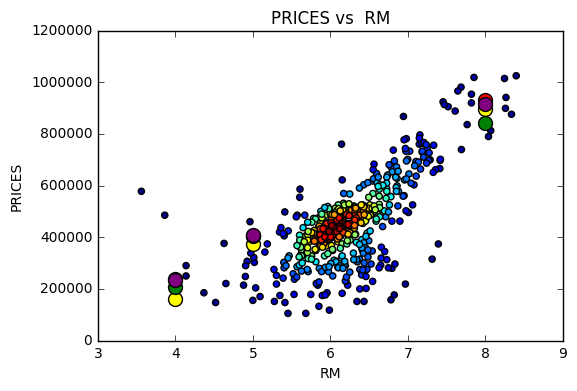

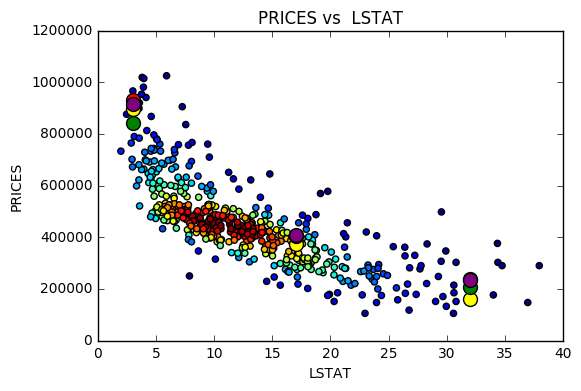

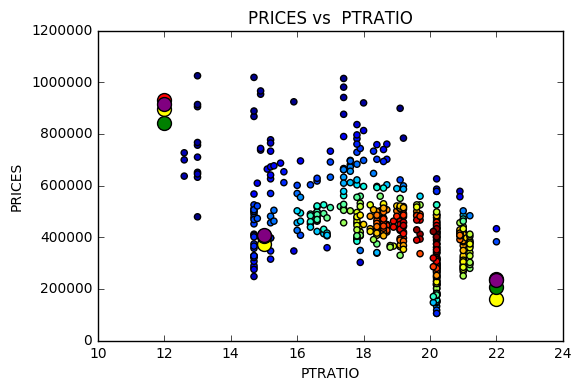

In [72]:
plot_predictions([predictions['Decision Tree'], predictions['Nearest Neighbors'][0], predictions['Nearest Neighbors'][1], predictions['Ada Boosting']],\
                ['red', 'yellow', 'green', 'purple'], ['Decision Tree Regressor', 'Nearest Neighborhood k = 5', 'Nearest Neighborhood k = 12', 'Ada Boosting Regressor'])


Hence, visually the values seem reasonable, now let's look at it from the data

In [73]:
print "For the training set\n"
test_stat(predictions['Ada Boosting'], 'train')
print "\nFor the testing set\n"
test_stat(predictions['Ada Boosting'], 'test')
print "\nThe results appear to be similar to that of the decision tree algorithm, yet with slightly better results\n"\
"\nLets compare it to the original predictions and the nearest neighbor predictions"
print "Decision tree algorithm: Client 1, ${}. Client 2, ${}. Client 3, ${}".format(predictions['Decision Tree'][0], predictions['Decision Tree'][1], predictions['Decision Tree'][2])
print "Nearest Neighbors k=5: Client 1, ${}. Client 2, ${}, Client 3, ${}".format(predictions['Nearest Neighbors'][0][0], predictions['Nearest Neighbors'][0][1], predictions['Nearest Neighbors'][0][2])
print "Ada boosting algorithm: Client 1, ${}, Client 2, ${}, Client 3, ${}".format(predictions['Ada Boosting'][0], predictions['Ada Boosting'][1], predictions['Ada Boosting'][2])

For the training set

At price point 408660.0 dollars, for Client 1, the p_value of the given price is 0.677585737927, the mean/optimum prediction is 401493.75, while the length is 16, and the standard deviation is 67606.6019335
At price point 233100.0 dollars, for Client 2, the p_value of the given price is 0.639346460998, the mean/optimum prediction is 247200.0, while the length is 7, and the standard deviation is 75626.3842849
At price point 916800.0 dollars, for Client 3, the p_value of the given price is 0.0187406373912, the mean/optimum prediction is 793100.0, while the length is 9, and the standard deviation is 126270.958656

For the testing set

At price point 408660.0 dollars, for Client 1, the p_value of the given price is 0.234749870078, the mean/optimum prediction is 438375.0, while the length is 4, and the standard deviation is 40079.2028364
At price point 233100.0 dollars, for Client 2, the p_value of the given price is 0, the mean/optimum prediction is 147000.0, while th

For this, the ada boosting regressor appears to be better off. Especially for Client 3, and since the variation of statistics in the test stat is negligible, since the only large change was for Client 1 in the training set where it decrease from a p score in the 0.90s to the 0.60s, it can be said that it makes up for that with the slight yet noticeable increase in p values for Client 2 and Client 3, and also for Client 1 in the testing set. Hence I will conclude this odyssey with an answer given to me by the optimal, Ada Boosting Regressor

**Answer: ** I will recommend Client 1's house to sell for 398160.0 dollars, Client 2's for 235809.7 dollars, and client 3's for 916100.0 dollars. These results are reasonable since they were calculated using the optimal regressor, which is in this case, as far as I could find, the Ada Boosting regressor. I did not merely compute the means because I saw it to be ungeneralizable. The predictions from this regressor scored high p values for its predictions for each of the client's houses, and also it was reasonably close to the prices given by the nearest neighborhood algorithm with k = 5

### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with the data it's trained on.

**Requirements to run the code below: ** I changed line 104 in the visuals.py to

def PredictTrials(X, y, fitter, reg_in, param_grid, data):

and line 116 to,

reg = fitter(X_train, y_train, reg_in, param_grid)

This does not change the functionality of the code yet will lead to be able to be generalizable to almost any kind of regressor and classifier. Hence, the change above is required to run the code cell below

In [ ]:
#For this I will use the decision tree regressor since while it is not optimum as the ada boosting regressor, the ada boosting regressor does not work with GridSearchCV, and since it is almost optimum
vs.PredictTrials(features, prices, fit_model, DecisionTreeRegressor(), {'max_depth': np.arange(1, 11)}, client_data)
#Yet I will just give it a try

    vs.PredictTrials(features, prices, fit_model, AdaBoostRegressor(DecisionTreeRegressor(max_depth = 4)), {'n_estimators': np.arange(40, 50), 'learning_rate': [0.1]}, client_data)

returned
    
    {'n_estimators': 43, 'learning_rate': 0.1}
    Trial 1: $384,537.74
    {'n_estimators': 41, 'learning_rate': 0.1}
    Trial 2: $411,460.00
    {'n_estimators': 47, 'learning_rate': 0.1}
    Trial 3: $400,244.44
    {'n_estimators': 44, 'learning_rate': 0.1}
    Trial 4: $392,205.88
    {'n_estimators': 48, 'learning_rate': 0.1}
    Trial 5: $396,637.50
    {'n_estimators': 40, 'learning_rate': 0.1}
    Trial 6: $419,852.63
    {'n_estimators': 40, 'learning_rate': 0.1}
    Trial 7: $390,200.00
    {'n_estimators': 43, 'learning_rate': 0.1}
    Trial 8: $394,734.38
    {'n_estimators': 41, 'learning_rate': 0.1}
    Trial 9: $383,337.50
    {'n_estimators': 41, 'learning_rate': 0.1}
    Trial 10: $406,350.00

Range in prices: $36,515.13
Hence the Ada Boosted Regressor seems to be somewhat more consistent, and optimal than the already optimal decision tree regressor.

### Question 11 - Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

**Answer: ** This model is not recommended to be used in a real world setting due to the fact that the data is simply inadequate, most of the time the location is much more an important feature of a house rather than the room numbers. As the hint above provides, it can also be said that data from 1978 is simply inadequate to describe a house's full potential for a customer. Yet this is just an analysis that I can draw from the data. In machine learning the most important aspect is not to discover the causation yet to find a correlation. If the parameters of location was the causation of the increase in price for larger room numbers, somehow, even if this is unlikely, then yes, the model will be robust enough to make consistent predictions, and yes it will be applicable to rural cities. Yet until the time that that is proven to be so the answer is no.